<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #8: Agrupación de textos
`Fecha de entrega: Abril 29, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
import re
import json
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [2]:
# Cargar datos
path = "./reviews_vidjew_es.csv"
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


###  `[10 pts]` Punto 1: Hacer pre-procesamiento del texto

In [3]:
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data["review_body"].values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names())
tfidf_matrix

,abajo,abalorio,abalorios,abaratar,abate,abierta,abierto,ablar,aboné,abre,...,éste,éxito,ópticas,última,últimas,últimos,única,únicamente,único,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  `[10 pts]` Punto 2: Método del codo para determinar $K$

In [27]:
ks = []
k_inertias = []

for k in range(1,30):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    k_inertia = kmeans.inertia_
    
    ks.append(k)
    k_inertias.append(k_inertia)

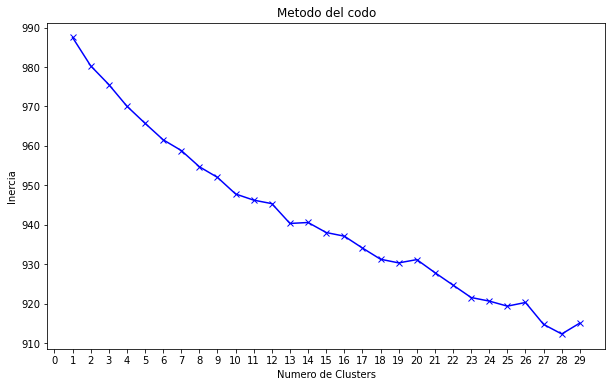

In [28]:
fig = plt.figure(figsize=(10,6))
plt.xlabel("Numero de Clusters")
plt.ylabel("Inercia")
plt.title("Metodo del codo")
plt.plot(ks, k_inertias, 'bx-')
plt.xticks(np.arange(len(ks)+1))
plt.show()

In [31]:
# for ki in range(1,len(k_inertias)):
#     inc = 100-(k_inertias[ki]/k_inertias[ki-1])*100
#     print(inc, ki+1)

###  `[10 pts]` Punto 3: Entrenar modelo con el $K$ escogido

In [32]:
k = 12
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)

KMeans(n_clusters=12)

In [33]:
data["cluster"] = model.labels_
data.sample(10)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster
655,es_0357214,product_es_0634369,reviewer_es_0535960,2,Son bonitas pero se rompen con la mirada. Una ...,Bonitas pero muy frágiles,es,jewelry,1
65,es_0946564,product_es_0862067,reviewer_es_0176088,3,Pequeño pero muy bonitos,Han llegado,es,jewelry,2
145,es_0248447,product_es_0859850,reviewer_es_0742996,2,"Es justito de calidad, lo devolví",No me gustó,es,jewelry,3
343,es_0919306,product_es_0373047,reviewer_es_0766392,1,primero compre uno y me enviaron dos.pague los...,malo no lo siguiente,es,video_games,7
492,es_0494663,product_es_0433765,reviewer_es_0528759,2,En la foto parece otra cosa. Yo entiendo que e...,Elena,es,jewelry,3
405,es_0133752,product_es_0531031,reviewer_es_0841376,3,El producto es correcto. Cadenita fina de plat...,Mantenimiento de la plata,es,jewelry,8
796,es_0326266,product_es_0237507,reviewer_es_0097471,1,La compré para usarla de tobillera y ha sido i...,Grande e incómoda,es,jewelry,7
722,es_0411534,product_es_0879137,reviewer_es_0221514,1,Después de más de un mes de espera. Todavía no...,Informalidad en el envio,es,jewelry,1
295,es_0663365,product_es_0513101,reviewer_es_0149039,1,"Primero no me llegó el producto, lo devolviero...",Un desastre,es,jewelry,1
549,es_0338417,product_es_0973141,reviewer_es_0950996,4,"Es muy chulo y práctico, llego muy rápido y de...",Bonito!,es,video_games,7


###  `[15 pts]` Punto 4: Interpretación de los clusters

In [35]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [39]:
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

centroids = model.cluster_centers_

terms = tfidf_vect.get_feature_names()
order_centroids = centroids.argsort()[:, ::-1]

for i in range(k):
    print(f"{bcolors.OKGREEN}Cluster # {i}{bcolors.ENDC}")
    print(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos)")
    print()
    
    print(f"{bcolors.OKCYAN}TÉRMINOS MÁS REPRESENTATIVOS{bcolors.ENDC}")
    for ind in order_centroids[i][:20]:
        print(terms[ind], end=" ")
    print()
    print()
    
    print(f"{bcolors.HEADER}DOCUMENTOS MÁS REPRESENTATIVOS{bcolors.ENDC}")
    for vecino in data.iloc[nbrs.kneighbors([centroids[i]])[1][0]]["review_body"].values:
        print(f" *** {vecino}")
        
    print()
    print("********************************************")
    print()

Cluster # 0
Tiene 87 registros (8.70% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
juego español jugar versión si viene divertido italiano esperaba gustado pena bien caja ingles play edición saga hacer familia solo 

DOCUMENTOS MÁS REPRESENTATIVOS
 *** Esperaba más del juego.
 *** No me ha gustado el juego.
 *** Juego en español, envío rápido

********************************************

Cluster # 1
Tiene 372 registros (37.20% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
llegado producto día si llego tiempo recibido foto pulsera llega llegó todavía bonita nunca gusta plata parece entrega esperaba mas 

DOCUMENTOS MÁS REPRESENTATIVOS
 *** No ha llegado el collar . Las demás cosas que he comprado en Amazon han llegado, pero este producto no me ha llegado.
 *** Todavía no he recibido el paquete que me tenía que haber llegado el día 7 de abril ( según ustedes me iba a llegar e:se día ) y estamos a día 10 de abril y todavía no ha llegado
 *** El producto ha llegado antes de lo previsto, me h

###  `[BONUS: 3 pts]` Visualización usando PCA

In [40]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data["cluster"]
result['texto'] = data["review_body"].apply(lambda val: val[:140])

result.head()

,X,Y,cluster,texto
0,0.486548,-0.326630,9,"Buen. Buena calidad, y buena presentación."
1,-0.106595,-0.152372,8,"Un producto a perfecto, para salir de casa con..."
2,-0.071067,-0.030106,10,No funciona con Nintendo Switch. No hay forma ...
3,0.031709,0.232798,7,"Recomendado, los utilizo para pc y no me dan n..."
4,0.016546,0.095297,7,El cable funciona bien podria ser un poco mas ...


In [61]:
import plotly.express as px
df = result
trace = px.scatter(df, x="X", y="Y", color="cluster",
                 hover_data=['texto'])
layout = go.Layout(title="PCA")
fig = go.Figure(data=trace, layout=layout)
iplot(fig)


Adjunto la imagen ya que en el notebook en github no lo esta visualizando..

<img src=".\pcr_.png">

# Comparación

### `[BONUS 15 pts (validos para cualquier tarea)]` 
### Hacer predicción para estas dos frases de los dos modelos (clasificación y $k$-means)

In [49]:
test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]

In [51]:
nuevo_trans = tfidf_vect.transform(test)
[model.predict(nuevo_trans)]

[array([0, 9])]

### `[5 pts]` Punto 5: Preguntas

- Según los resultados del $K$-Means, ¿cuál es la estructura de los datos?
- ¿Qué diferencia notó entre los resultados del taller pasado y este?
- ¿Alguna otra observación?

- los clusters se generan a partir de la importancia de los terminos abarcados en cada review, notando que para algunas familias de palabras relevantes genera un cluster asociado a la misma, por ejemplo el cluster_1 que contiene el 37% de los datos se observa que esta asociado a la entrega o No entrega de cierto producto en especifico.
- Dado que el son ejercicios con objetivos totalmente diferentes (en uno se precide una clase y en este se trata de obtener los clusters a partir de los datos), en este podemos profundizar un poco mas sobre los datos e inferir ciertas clases que dependen de la naturaleza misma de los datos, lo que nos permitiria un mejor ejercicio de segmentación e inferencia de mas clases.
- Para este ejercicio particular es un poco complejo elegir el punto de codo para la seleccion de los k-clusters, por lo que es necesario identificar la necesidad de negocio en particular y que los analistas funcionales sean quien a criterio de juicio de expertos permitan identificar de manera mas clara los k-clusters a utilizar.